In [28]:
import pandas as pd
import plotly.express as px

In [41]:
df=pd.read_excel(r'MCT_Data.xlsx')

try:
    
    df['Datum/date']=pd.to_datetime(df['Datum/date'],format='%d.%m.%Y_%H.%M', errors='coerce')
except Exception as e:
    print(e)
    #df['Datum/date']=pd.to_datetime(df['Datum/date'],format='%d.%m.%y_%H.%M')

df['Date']=df['Datum/date'].dt.date
df['Time']=df['Datum/date'].dt.time

df['Time'] =pd.to_datetime(df.Time, errors='coerce')


#df[['Date','Time']]=df[['Date','Time']].apply(pd.to_datetime)

df_dt_sorted=df.sort_values(by='Datum/date')


In [110]:
#Mean and median no. of mct for a machine

#df_dt_sorted.groupby(['Maschinen-Nr./machine-no.'])#unique machine numbers
new_df=df_dt_sorted.groupby(['Maschinen-Nr./machine-no.']).count()
new_df.to_html('new_df.html')
print(new_df['Maschinen-Typ/machine-type'].mean(),new_df['Maschinen-Typ/machine-type'].median())

#fig = go.Figure()
#fig.add_trace(go.Histogram(x=new_df['Maschinen-Nr./machine-no.']))
#fig.add_trace(go.Bar(x=df_dt_sorted['Kopftyp/head-type']))
#fig.update_layout(barmode='stack')
#fig.show()

4.63681592039801 3.0


In [153]:
#no. of mct per machine

new_df=df_dt_sorted.groupby(['Maschinen-Nr./machine-no.'],as_index=False).count()#.agg(lambda x:x.tolist())
print(new_df)
new_df_slice=new_df[['Maschinen-Nr./machine-no.','Datum/date']]
#new_df_slice.info()


import plotly.express as px
fig=px.line(new_df_slice,x='Maschinen-Nr./machine-no.',y='Datum/date')
fig.show()

#df_dt_sorted.groupby(['Maschinen-Nr./machine-no.'],as_index=False).count()

    Maschinen-Nr./machine-no.  Unnamed: 0  Maschinen-Typ/machine-type  \
0                        0006           2                           2   
1                     0006_00           1                           1   
2                     0006_01           1                           1   
3                     0006_02           1                           1   
4                     0006_03           1                           1   
..                        ...         ...                         ...   
196                    TB220G           6                           6   
197                    TB221G          10                          10   
198                      Test           1                           1   
199                    X_B351           2                           2   
200                       c98           1                           1   

     Kopftyp/head-type  Systemabnehmer/setup-engineer  Transport/conveyor  \
0                    2                        

In [155]:
new_df_slice=df_dt_sorted[['Maschinen-Nr./machine-no.','Datum/date']]

In [151]:
try:
    new_df_slice['Datum/date']=pd.to_datetime(new_df_slice['Datum/date'],format='%d.%m.%Y_%H.%M', errors='coerce')
except Exception as e:
    print(e)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
new_df_slice['Year']=df['Datum/date'].dt.year
new_df_slice['Month']=df['Datum/date'].dt.month
new_df_slice['day']=df['Datum/date'].dt.day



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [159]:
new_df_slice

,Maschinen-Nr./machine-no.,Datum/date,Year,Month,day
223,C_22,2006-05-04 14:31:00,2006.0,5.0,4.0
224,C_22,2006-05-04 15:18:00,2006.0,5.0,4.0
227,C1,2006-05-05 07:19:00,2006.0,5.0,5.0
228,C1,2006-05-05 07:52:00,2006.0,5.0,5.0
229,C1,2006-05-05 09:02:00,2006.0,5.0,5.0
...,...,...,...,...,...
993,NaN,NaT,NaN,NaN,NaN
994,NaN,NaT,NaN,NaN,NaN
995,NaN,NaT,NaN,NaN,NaN
996,NaN,NaT,NaN,NaN,NaN


In [166]:
import plotly.express as px
fig=px.line(new_df_slice,x='Year',y='Maschinen-Nr./machine-no.')
fig.show()

In [144]:
df_dt_sorted['Datum/date'].dt.year

223    2006.0
224    2006.0
227    2006.0
228    2006.0
229    2006.0
        ...  
993       NaN
994       NaN
995       NaN
996       NaN
997       NaN
Name: Datum/date, Length: 998, dtype: float64

# Plotly Express

#Notes:
was machine type c4 and ca4 introduced at a later date?

combination of machine number and header number, machine number and machine type and header, 

changing the time scale x axis?

In [96]:
#machine number is unique for evry machine, so doesn't cluster unknown data
import plotly.express as px
fig=px.line(df_dt_sorted,x='Datum/date',y='Maschinen-Nr./machine-no.')
fig.show()

In [49]:
import plotly.express as px
fig=px.line(df_dt_sorted,x='Datum/date',y='Maschinen-Typ/machine-type')
fig.show()

In [50]:
import plotly.express as px
fig=px.line(df_dt_sorted,x='Datum/date',y='Kopftyp/head-type')
fig.show()

In [91]:
fig = px.histogram(df_dt_sorted,x='Maschinen-Typ/machine-type',y='Datum/date')
fig.show()

In [52]:
#gapminder = px.data.gapminder().query("continent != 'Asia'") # remove Asia for visibility
fig = px.line(df_dt_sorted, x="Datum/date", y="Maschinen-Nr./machine-no.", color="Maschinen-Typ/machine-type",
              line_group="Kopftyp/head-type")#, hover_name="country")
fig.show()

KeyError: ('D1', '', '', '', '', nan)

# Plotly

In [57]:
df=pd.read_excel(r'MCT_Data.xlsx')

try:
    
    df['Datum/date']=pd.to_datetime(df['Datum/date'],format='%d.%m.%Y_%H.%M', errors='coerce')
except Exception as e:
    print(e)
    #df['Datum/date']=pd.to_datetime(df['Datum/date'],format='%d.%m.%y_%H.%M')

df['Date']=df['Datum/date'].dt.date
df['Time']=df['Datum/date'].dt.time

df['Time'] =pd.to_datetime(df.Time, errors='coerce')


#df[['Date','Time']]=df[['Date','Time']].apply(pd.to_datetime)

df_dt_sorted=df.sort_values(by='Datum/date')

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
     go.Scatter(
        x=df_dt_sorted['Datum/date'],
        y=df_dt_sorted['Maschinen-Typ/machine-type'],
        name='Machine Type'
    ),
    secondary_y=False,
    )

fig.add_trace(
    go.Scatter(
        x=df_dt_sorted['Datum/date'],
        y=df_dt_sorted['Kopftyp/head-type'],
        name ='Head Type'
    ),
    secondary_y=True,
    )

'''fig.add_trace(
    go.Bar(
        x=[0, 1, 2, 3, 4, 5],
        y=[1, 0.5, 0.7, -1.2, 0.3, 0.4]
    ))'''

fig.update_yaxes(title_text='Head Type',secondary_y=True)
fig.update_yaxes(title_text='Machine Type',secondary_y=False)


fig.show()

In [82]:
#Bar Chart that plots no. of mcts per machine type, may also display head type per machine type
import plotly.graph_objects as go
#df_dt_sorted_slice=df_dt_sorted['Datum/date']<==

fig = go.Figure([go.Bar(
    x=df_dt_sorted['Maschinen-Typ/machine-type'],
    y=df_dt_sorted['Datum/date'],
       )])

fig.show()


In [81]:
ax = df_dt_sorted.plot.bar(x='Datum/date',y='Maschinen-Typ/machine-type',rot=0)

TypeError: no numeric data to plot

In [55]:
#df_dt_sorted['Maschinen-Typ/machine-type']=pd.to_numeric(df_dt_sorted['Maschinen-Typ/machine-type'])
cols = ['Maschinen-Typ/machine-type', 'Kopftyp/head-type','Maschinen-Nr./machine-no.']
df_dt_sorted[cols] = df_dt_sorted[cols].apply(pd.to_numeric, errors='coerce', axis=1)

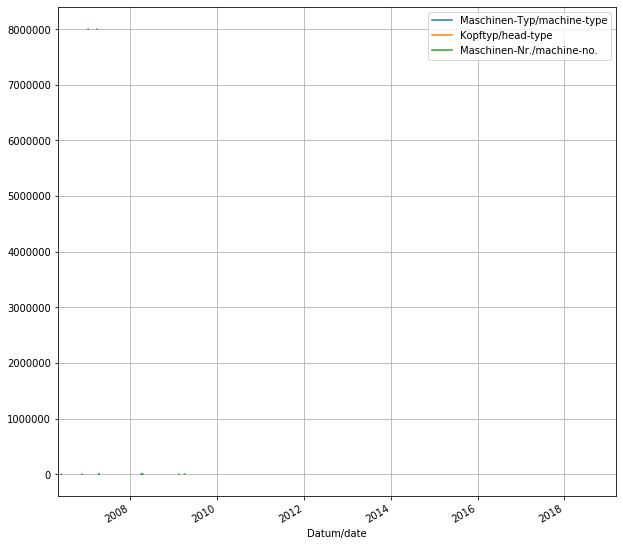

In [56]:
df_dt_sorted.plot(x='Datum/date', y=['Maschinen-Typ/machine-type','Kopftyp/head-type','Maschinen-Nr./machine-no.'], figsize=(10,10), grid=True)

#px.scatter_matrix(df_dt_sorted, dimensions=['Maschinen-Typ/machine-type',])

In [89]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_dt_sorted['Maschinen-Typ/machine-type']))
fig.add_trace(go.Bar(x=df_dt_sorted['Kopftyp/head-type']))
#fig.update_layout(barmode='stack')
fig.show()

# Altair plot

In [49]:
import altair as alt
df = pd.DataFrame({'local': ['2018-01-01T00:00:00'],
                   'utc': ['2018-01-01T00:00:00Z']})

alt.Chart(df).transform_calculate(
    compliant="hours(datum.local) != hours(datum.utc) ? true : false",
).mark_text(size=20, baseline='middle').encode(
    text=alt.condition('datum.compliant', alt.value('OK'), alt.value('not OK')),
    color=alt.condition('datum.compliant', alt.value('green'), alt.value('red'))
).properties(width=80, height=50)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
